# Submission - Inquisitive_Turtles

In [230]:
import kagglehub
path = kagglehub.dataset_download("schran/insurance-premium-prediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance-premium-prediction


In [231]:
import pandas as pd
df = pd.read_csv('/kaggle/input/insurance-premium-prediction/Insurance Premium Prediction Dataset.csv')
print(df.columns,df.dtypes)

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object') Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age               int64
Credit Score            float64
Insurance Duration        int64
Premium Amount          float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency

In [232]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,274175.000000,264905.000000,250974.000000,268263.000000,197572.000000,278860.000000,250974.000000,278860.000000,277019.000000
mean,41.020771,42089.085329,1.998048,28.584290,0.998117,9.520283,574.362049,5.007764,966.118667
std,13.549683,35444.517255,1.412312,15.966208,1.000795,5.767915,158.792037,2.581349,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13588.000000,1.000000,16.149890,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32191.000000,2.000000,26.451244,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62164.000000,3.000000,38.966369,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [233]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

Age                      4685
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Occupation              81288
Health Score            10597
Previous Claims         81288
Credit Score            27886
Premium Amount           1841
Customer Feedback       18349
dtype: int64


Getting rid of null values in target column

In [234]:
df = df.dropna(subset = 'Premium Amount')

In [235]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

Age                      4658
Annual Income           13851
Marital Status           4991
Number of Dependents    27689
Occupation              80748
Health Score            10525
Previous Claims         80749
Credit Score            27700
Customer Feedback       18258
dtype: int64


In [236]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,272361.000000,263168.000000,249330.000000,266494.000000,196270.000000,277019.000000,249319.000000,277019.000000,277019.000000
mean,41.020139,42095.013159,1.998267,28.583739,0.998105,9.519318,574.389365,5.007898,966.118667
std,13.548304,35443.338341,1.412300,15.964010,1.000770,5.767438,158.794989,2.581473,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13591.000000,1.000000,16.149422,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32207.000000,2.000000,26.448428,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62176.500000,3.000000,38.964028,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [237]:
Q1 = df['Previous Claims'].quantile(0.25)
Q3 = df['Previous Claims'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]
df_outliers = df[(df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]

print('number of outliers: ',df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers:",df['Previous Claims'].count())
print("DataFrame after removing outliers:",df_cleaned['Previous Claims'].count())

number of outliers:  117
Original DataFrame with outliers: 196270
DataFrame after removing outliers: 196153


In [238]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,192857.000000,186380.000000,176596.000000,188706.000000,196153.000000,196153.000000,176456.000000,196153.000000,196153.000000
mean,41.002276,42048.496631,1.999219,28.569734,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.540229,35408.827384,1.412334,15.967410,0.992727,5.767753,158.823202,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13616.750000,1.000000,16.133740,0.000000,4.000000,437.000000,3.000000,287.000000
50%,41.000000,32167.000000,2.000000,26.424062,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62015.750000,3.000000,38.909943,2.000000,15.000000,712.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [239]:
mean_imputation_cols = ['Age','Number of Dependents','Credit Score','Credit Score']

In [240]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_cleaned[mean_imputation_cols]= imputer.fit_transform(df_cleaned[mean_imputation_cols])
print(df_cleaned)



         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-240-a269f45f3bbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mean_imputation_cols]= imputer.fit_transform(df_cleaned[mean_imputation_cols])


In [241]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,186380.000000,196153.000000,188706.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,42048.496631,1.999219,28.569734,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35408.827384,1.340079,15.967410,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,13616.750000,1.000000,16.133740,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,32167.000000,2.000000,26.424062,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,62015.750000,3.000000,38.909943,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [242]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Annual Income         9773
Marital Status        3490
Occupation           57166
Health Score          7447
Customer Feedback    12959
dtype: int64


In [243]:
mode_imputation_cols=['Annual Income','Health Score']

In [244]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-244-3e9759c0bb16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])


In [245]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Marital Status        3490
Occupation           57166
Customer Feedback    12959
dtype: int64


In [246]:
mode_imputation_cols=['Marital Status','Occupation']

In [247]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [248]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-248-3e9759c0bb16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])


In [249]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Customer Feedback    12959
dtype: int64


In [250]:
df_cleaned['Customer Feedback']= df_cleaned['Customer Feedback'].fillna('')

<ipython-input-250-1308beb94693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer Feedback']= df_cleaned['Customer Feedback'].fillna('')


In [251]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Series([], dtype: int64)


In [252]:
df_cleaned.dtypes

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age               int64
Credit Score            float64
Insurance Duration        int64
Premium Amount          float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
dtype: object

In [253]:
df_cleaned.shape

(196153, 20)

In [254]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


# One Hot encoding

In [255]:
from sklearn.preprocessing import OneHotEncoder
encoding_cols=['Customer Feedback','Occupation','Education Level','Marital Status',
               'Property Type','Exercise Frequency','Smoking Status','Policy Type','Gender','Location']


encoder = OneHotEncoder(sparse=False)

#Fit and transform the encoding columns
encoded_array = encoder.fit_transform(df_cleaned[encoding_cols])

#Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoding_cols))

# Drop original columns and concatenate encoded columns
df_cleaned = pd.concat([df_cleaned.drop(columns=encoding_cols), encoded_df], axis=1)

# Display the result
print(df_cleaned)

df_cleaned.columns



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


         Age  Annual Income  Number of Dependents  Health Score  \
2       32.0        30154.0                   3.0     14.714909   
3       60.0        48371.0                   0.0     25.346926   
5       38.0        31769.0                   1.0     14.736611   
6       56.0        26209.0                   1.0     33.238300   
7       36.0         8762.0                   3.0     13.887880   
...      ...            ...                   ...           ...   
196137   NaN            NaN                   NaN           NaN   
196138   NaN            NaN                   NaN           NaN   
196139   NaN            NaN                   NaN           NaN   
196142   NaN            NaN                   NaN           NaN   
196146   NaN            NaN                   NaN           NaN   

        Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
2                   2.0         16.0         652.0                 8.0   
3                   1.0         11.0         33

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Policy Start Date', 'Customer Feedback_',
       'Customer Feedback_Average', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Occupation_Employed',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Property Type_Apartment',
       'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Locati

In [256]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,...,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660,0.066066,...,0.498738,0.501262,0.333755,0.331578,0.334667,0.498993,0.501007,0.331552,0.335488,0.332959
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664,0.248398,...,0.500000,0.500000,0.471555,0.470781,0.471875,0.500000,0.500000,0.470772,0.472162,0.471273
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
df_cleaned.head(5)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
2,32.0,30154.0,3.0,14.714909,2.0,16.0,652.0,8.0,849.0,2023-11-26 15:21:39.078837,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,60.0,48371.0,0.0,25.346926,1.0,11.0,330.0,7.0,927.0,2023-02-27 15:21:39.078837,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,38.0,31769.0,1.0,14.736611,1.0,9.0,521.0,7.0,4016.0,2020-09-16 15:21:39.078837,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,56.0,26209.0,1.0,33.238300,0.0,10.0,424.0,5.0,828.0,2021-03-29 15:21:39.078837,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,36.0,8762.0,3.0,13.887880,1.0,15.0,641.0,9.0,1678.0,2022-12-21 15:21:39.078837,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [258]:
df_cleaned.dtypes

Age                            float64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Premium Amount                 float64
Policy Start Date               object
Customer Feedback_             float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [259]:
df_cleaned = df_cleaned.dropna()

In [260]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,40.988243,40108.399197,1.999313,27.475101,0.996781,9.500192,574.596997,5.009635,965.759484,0.065929,...,0.499953,0.500047,0.333747,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536
std,13.421230,35594.487154,1.340000,16.578781,0.993894,5.768777,150.311954,2.581906,908.351252,0.248158,...,0.500002,0.500002,0.471552,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,11233.000000,1.000000,14.858647,0.000000,4.000000,453.000000,3.000000,287.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,30004.000000,2.000000,25.576818,1.000000,10.000000,574.588645,5.000000,689.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,53.000000,59897.000000,3.000000,38.324267,2.000000,15.000000,697.000000,7.000000,1364.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Series([], dtype: int64)


In [262]:
df_cleaned.dtypes

Age                            float64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Premium Amount                 float64
Policy Start Date               object
Customer Feedback_             float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [263]:
df_cleaned['Number of Dependents'].unique()

array([3.        , 0.        , 1.        , 4.        , 2.        ,
       1.99921856])

In [264]:
df_cleaned['Number of Dependents'] = df_cleaned['Number of Dependents'].astype('int32')

In [265]:
df_cleaned['Policy Start Date'] = df_cleaned['Policy Start Date'].astype('datetime64[ns]')

In [266]:
df_cleaned.dtypes

Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Premium Amount                        float64
Policy Start Date              datetime64[ns]
Customer Feedback_                    float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [267]:
result = df_cleaned[np.isclose(df_cleaned['Customer Feedback_'],1.)]
print(result['Customer Feedback_'].count())

9094


In [268]:
df_cleaned.count()

Age                            137937
Annual Income                  137937
Number of Dependents           137937
Health Score                   137937
Previous Claims                137937
Vehicle Age                    137937
Credit Score                   137937
Insurance Duration             137937
Premium Amount                 137937
Policy Start Date              137937
Customer Feedback_             137937
Customer Feedback_Average      137937
Customer Feedback_Good         137937
Customer Feedback_Poor         137937
Occupation_Employed            137937
Occupation_Self-Employed       137937
Occupation_Unemployed          137937
Education Level_Bachelor's     137937
Education Level_High School    137937
Education Level_Master's       137937
Education Level_PhD            137937
Marital Status_Divorced        137937
Marital Status_Married         137937
Marital Status_Single          137937
Property Type_Apartment        137937
Property Type_Condo            137937
Property Typ

In [269]:
df_cleaned['Annual Income'].unique()

array([ 30154.,  48371.,  31769., ...,  13682., 117206.,  80941.])

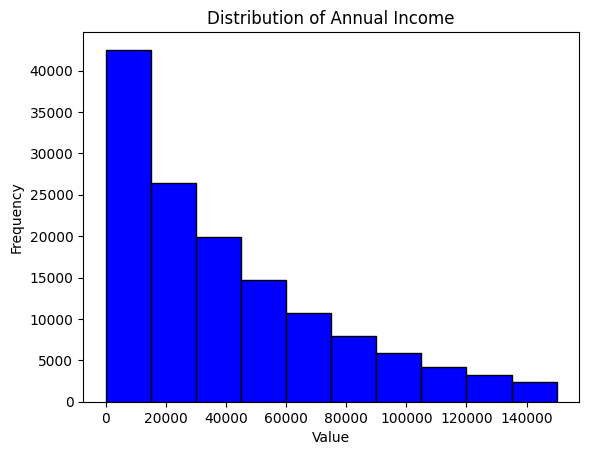

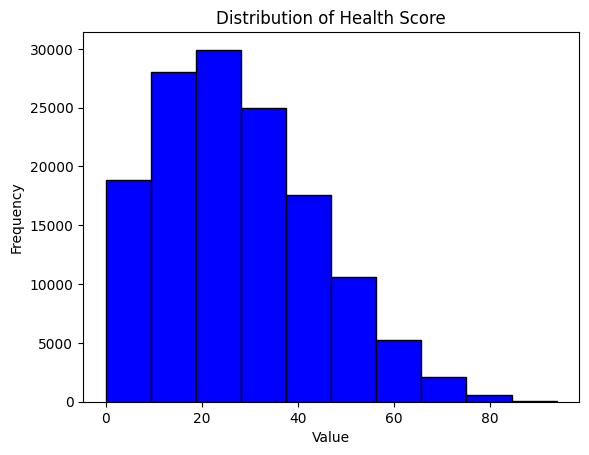

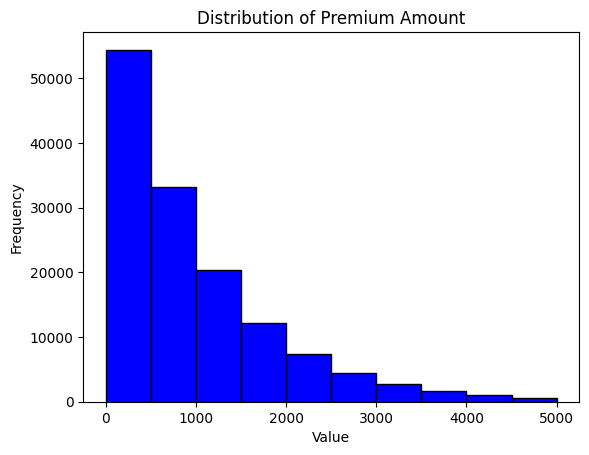

In [270]:
import matplotlib.pyplot as plt
bef=['Annual Income','Health Score','Premium Amount']
for i in range(len(bef)):
    plt.hist(df_cleaned[bef[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {bef[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [271]:
df_cleaned['Health_Score_sqrt'] = df_cleaned['Health Score'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df_cleaned['Annual_Income_sqrt'] = df_cleaned['Annual Income'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df_cleaned['Premium_Amount_Score_sqrt'] = df_cleaned['Premium Amount'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)


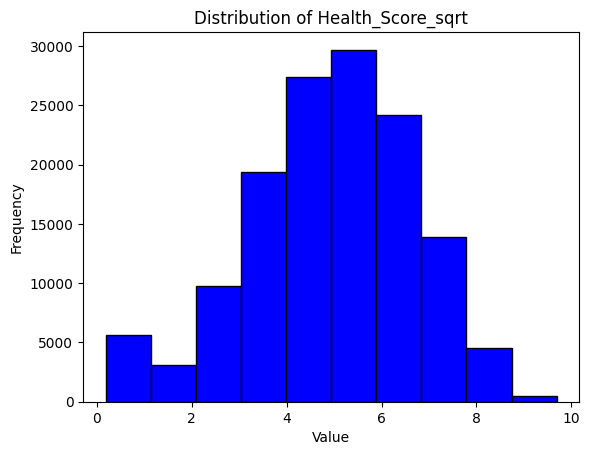

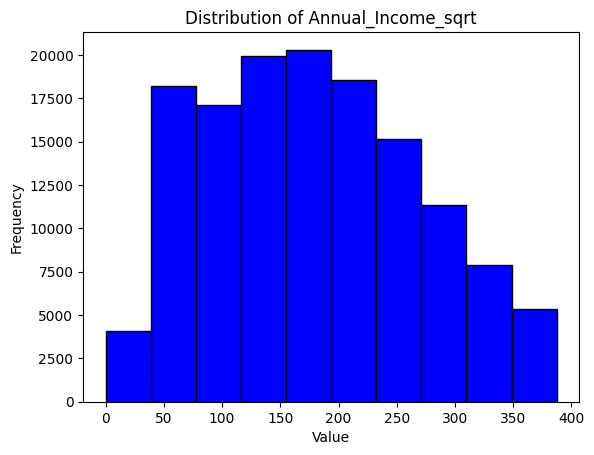

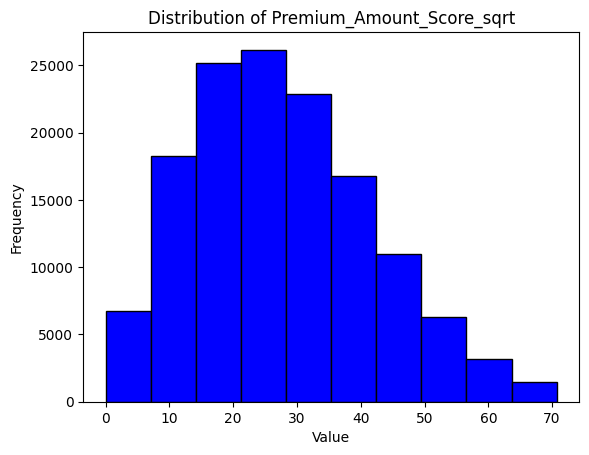

In [272]:
import matplotlib.pyplot as plt
aft=['Health_Score_sqrt','Annual_Income_sqrt','Premium_Amount_Score_sqrt']
for i in range(len(aft)):
    plt.hist(df_cleaned[aft[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {aft[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [273]:
df_cleaned.dtypes

Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Premium Amount                        float64
Policy Start Date              datetime64[ns]
Customer Feedback_                    float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [274]:
df_cleaned.drop(columns=bef)

,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback_,Customer Feedback_Average,Customer Feedback_Good,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
2,32.0,3,2.0,16.0,652.0,8.0,2023-11-26 15:21:39.078837,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.836002,173.649071,29.137605
3,60.0,0,1.0,11.0,330.0,7.0,2023-02-27 15:21:39.078837,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.034573,219.934081,30.446675
5,38.0,1,1.0,9.0,521.0,7.0,2020-09-16 15:21:39.078837,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.838829,178.238604,63.371918
6,56.0,1,0.0,10.0,424.0,5.0,2021-03-29 15:21:39.078837,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.765267,161.891939,28.774989
7,36.0,3,1.0,15.0,641.0,9.0,2022-12-21 15:21:39.078837,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.726645,93.605555,40.963398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196148,39.0,2,1.0,15.0,652.0,7.0,2023-04-08 15:21:39.226954,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.465454,87.988636,70.007142
196149,61.0,1,1.0,1.0,522.0,7.0,2021-09-02 15:21:39.226954,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.736932,116.970082,36.221541
196150,38.0,3,0.0,11.0,470.0,5.0,2022-08-07 15:21:39.226954,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.549367,342.353618,29.274562
196151,48.0,1,1.0,7.0,418.0,8.0,2020-10-22 15:21:39.226954,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.188245,284.501318,42.813549


In [275]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,40.988243,40108.399197,1.899824,27.475101,0.996781,9.500192,574.596997,5.009635,965.759484,2022-02-16 19:12:14.477351680,...,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536,4.926279,178.423315,27.696316
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,2019-08-17 15:21:39.080440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188245,0.000000,0.000000
25%,30.000000,11233.000000,1.000000,14.858647,0.000000,4.000000,453.000000,3.000000,287.000000,2020-11-18 15:21:39.146733056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.854692,105.985848,16.941074
50%,41.000000,30004.000000,2.000000,25.576818,1.000000,10.000000,574.588645,5.000000,689.000000,2022-02-17 15:21:39.193945088,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.057353,173.216627,26.248809
75%,53.000000,59897.000000,3.000000,38.324267,2.000000,15.000000,697.000000,7.000000,1364.000000,2023-05-18 15:21:39.134960128,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.190660,244.738636,36.932371
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,2024-08-15 15:21:39.223901,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.688967,387.294462,70.703607
std,13.421230,35594.487154,1.373002,16.578781,0.993894,5.768777,150.311954,2.581906,908.351252,NaN,...,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124,1.790781,90.959221,14.095212


In [276]:
exclude = 'Policy Start Date'
remaining = df_cleaned.drop(columns=[exclude]).columns.tolist()
print(remaining)

['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount', 'Customer Feedback_', 'Customer Feedback_Average', 'Customer Feedback_Good', 'Customer Feedback_Poor', 'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed', "Education Level_Bachelor's", 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House', 'Exercise Frequency_Daily', 'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly', 'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic', 'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female', 'Gender_Male', 'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Health_Score_sqrt', 'Annual_Income_sqrt', 'Premium_Amount_Score_sqrt']


In [277]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned[remaining] = scaler.fit_transform(df_cleaned[remaining])

In [278]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,0.499744,0.267395,0.474956,0.292407,0.199356,0.500010,0.500177,0.501204,0.193191,2022-02-16 19:12:14.477351680,...,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536,0.498703,0.460692,0.391724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-08-17 15:21:39.080440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.074888,0.250000,0.157962,0.000000,0.210526,0.278689,0.250000,0.057411,2020-11-18 15:21:39.146733056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385912,0.273657,0.239607
50%,0.500000,0.200031,0.500000,0.272178,0.200000,0.526316,0.500161,0.500000,0.137828,2022-02-17 15:21:39.193945088,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.512499,0.447248,0.371251
75%,0.760870,0.399321,0.750000,0.408020,0.400000,0.789474,0.723133,0.750000,0.272855,2023-05-18 15:21:39.134960128,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.631785,0.631919,0.522355
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024-08-15 15:21:39.223901,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.291766,0.237301,0.343250,0.176669,0.198779,0.303620,0.273792,0.322738,0.181707,NaN,...,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124,0.188489,0.234858,0.199356


In [279]:
train_df = pd.read_csv('/kaggle/input/data-insurance/train.csv')
test_df = pd.read_csv('/kaggle/input/test-data/test (1).csv')

In [281]:
def describe_df(df):
    df.describe()
describe_df

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,8.000000e+05,787511.000000,770140.000000,726870.000000,750551.000000,557198.000000,799997.000000,708549.000000,799998.000000
mean,1.600000e+06,41.136440,32803.871471,2.009337,25.613036,1.004873,9.571891,592.904749,5.018949
std,2.309403e+05,13.537829,32201.063749,1.415241,12.206882,0.982803,5.772200,150.116374,2.593759
min,1.200000e+06,18.000000,2.000000,0.000000,1.646561,0.000000,0.000000,300.000000,1.000000
25%,1.400000e+06,30.000000,8048.000000,1.000000,15.917353,0.000000,5.000000,468.000000,3.000000
50%,1.600000e+06,41.000000,23981.000000,2.000000,24.580164,1.000000,10.000000,595.000000,5.000000
75%,1.799999e+06,53.000000,44660.000000,3.000000,34.517766,2.000000,15.000000,721.000000,7.000000
max,1.999999e+06,64.000000,149997.000000,4.000000,57.957351,9.000000,19.000000,849.000000,9.000000


In [292]:
def check_missing(df):
    missing_values = df.isnull().sum()
    cols_with_missing = missing_values[missing_values > 0]
    print(cols_with_missing)
    print('\n')
check_missing(train_df)
check_missing(test_df)

Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64


Age                      12489
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Occupation              239125
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
dtype: int64




In [285]:
train_df = train_df.dropna(subset = 'Premium Amount')

In [289]:
Q1 = train_df['Previous Claims'].quantile(0.25)
Q3 = train_df['Previous Claims'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df_cleaned = train_df[(train_df['Previous Claims'] >= lower_bound) & (train_df['Previous Claims'] <= upper_bound)]
train_df_outliers = train_df[(train_df['Previous Claims'] < lower_bound) | (train_df['Previous Claims'] > upper_bound)]

print('number of outliers: ',train_df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers:",train_df['Previous Claims'].count())
print("DataFrame after removing outliers:",train_df_cleaned['Previous Claims'].count())

number of outliers:  369
Original DataFrame with outliers: 835971
DataFrame after removing outliers: 835602
